# **Multiclass Classlification uisng keras**

# **1] Objective**

In this notebook, we will build a multiclass classification neural network model to classify handwritten digits using a popular dataset name 'MNIST'.

The objective here is to build a modle that would recognize the correct digit that the given is image representing.

# **2] Data Description**

MNIST(Modified national Institute of standards and Technology database) is a large dataset of 70,000 handwritten digits. It has a training set of 60,000 examples and a test set of 10,000 examples.

# **3] Importing the Libraries**

In [ ]:
# import libraries
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# check the Tensroflow and keras versions
print("Tensorflow version ::",tf.__version__)
print("Keras Version ::",tf.keras.__version__)

Tensorflow version :: 2.18.0
Keras Version :: 3.8.0


In [ ]:
(x_train,y_train) , (x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Number of training examples :",x_train.shape[0],"and each image is of shape ((%d,%d) i.e pixels)"%(x_train.shape[1],x_train.shape[2]))
print("Number of test examples :",x_test.shape[0], "and each image is of shape ((%d,%d) i.e pixels)"%(x_test.shape[1],x_test.shape[2]))

Number of training examples : 60000 and each image is of shape ((28,28) i.e pixels)
Number of test examples : 10000 and each image is of shape ((28,28) i.e pixels)


In [ ]:
print(x_train[0])

NameError: name 'x_train' is not defined

In [ ]:
# Let's take a look at how one image looks like
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

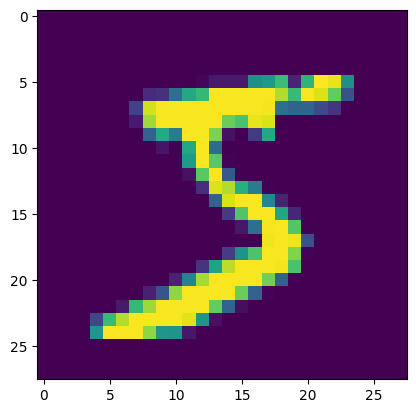

In [ ]:
plt.imshow(x_train[0])

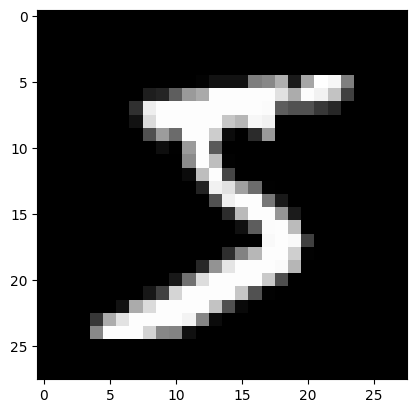

In [ ]:
plt.imshow(x_train[0],cmap="gray")
plt.show()


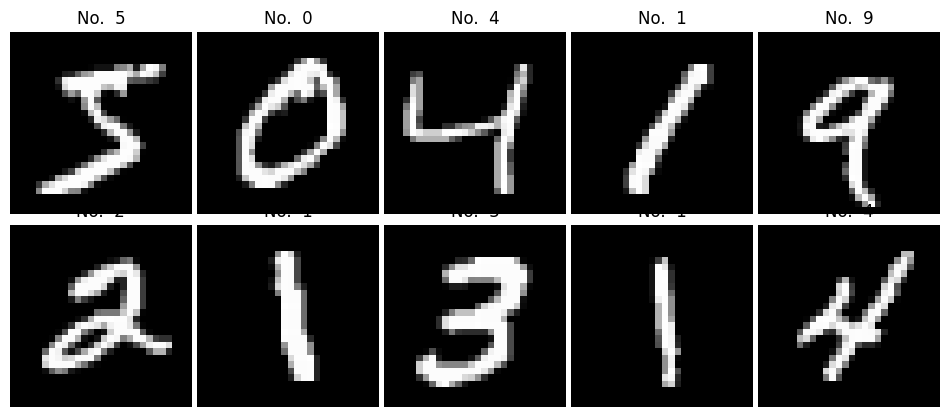

In [ ]:
# code to view the images
num_rows,num_cols=2,5

f,ax = plt.subplots(num_rows,num_cols,figsize=(12,5),
                    gridspec_kw={'wspace':0.03,'hspace':0.01},
                    squeeze=True
                    )

for r in range(num_rows):
  for c in range(num_cols):
    image_index = r*5 + c
    ax[r,c].axis('off')
    ax[r,c].imshow(x_train[image_index],cmap="gray")
    ax[r,c].set_title('No.  %d' % y_train[image_index])

plt.show()
plt.close()

# **5] Prepare the Data**

In [ ]:
# check the shape of input
x_train.shape

(60000, 28, 28)

# **Observation:**

Here, we can see that each datapoint is 3 dimensional. Where the first value i.e 60000 is the number of records and the second and third value represents each image i.e each image is a 2D vector of shape 28X28.

In most of the supervised learning task like classification and regression in machine learning and deep learning, we use the 2-dimensional data. But, here we have 3-dimensional data so we need to flatten or convert this 3D data to 2D data


# **5.1] Flatten the data to 2D**

In [ ]:
# we will convert the 2D vector of (28X28) shape to 1D vector of (1X784) shape

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [ ]:
# After flattening the input images, let's check the shape now
print("Number of training examples: ",x_train.shape[0],"and each image is of shape %d" %x_train.shape[1])
print("Number of testing examples:",x_test.shape[0],"and each image is of shape %d" %x_test.shape[1])

Number of training examples:  60000 and each image is of shape 784
Number of testing examples: 10000 and each image is of shape 784


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
# An example data point
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

# **5.2] Normalizing the data**

The pixels values ranges from 0-255 represents the RGB(Red,Green and Blue) color values.

Normalize the values using **Min-Max Scaler.**

Formula is: **X=(X-X_min)/(X_max-X_min) = X/255**

In [ ]:
# Normalizing the datapoints within the scale of 0-1 using Min-Max Scaler
x_train = x_train/255
x_test = x_test/255

In [ ]:
# Example data point after normalizing
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
# class labels
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# **6] Building a Multiclass Classification Neural Network**
Steps to build a Neural Network using Keras:
 1. Defining and creating a neural network
 2. Compile a neural network.
 3. Training a neural network.
 4. Evaluate a trained neural network.
 5. Predictions using a trained neural network.


**Our model architecture**

we will create a Sequential model and add layers one at a time using a Sequential Model API.

There are two key architecture decisions to be made about such a stack of Dense layers:
 1. How many layers to use.
 2. How many hidden units to choose for each layer

 For our model, we'll be considering the following:
   1. Input=the no. of features in X_train=784
   2. No.of neurons/units in the first dense layer = 512
   3. No. of neurons/units in the second dense layer = 128
   4. No. of neurons/units int the output layer=10  

In [ ]:
# create a Neural Network

# import Libraries for building sequential models with dense layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
# keras.layers.Dense(units,activation=None, use_bias=True, kernel_initializer='glorot_uniform')
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,kernel_constraint=None,bias_constraint=None)

# Dense implements the operation: ouput = activation(dot(input,kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument,
# kernels a weights matrix created by the layer, and
# bias is a bias vector create by thde layer (only applicable if use is True)

#output = activation(dot(input,kernel)+bias) => y = activation(W^T.X + b)

In [ ]:
# Building the model
# Define the input and output

input_dims = x_train.shape[1]
output_dims = 10

# Defining the squential model
model = Sequential()

#Add the  Input layer
#model.add(tf.keras.Input(shape=(input_dims,),name="input_layer"))

#add the first dense layer to the sequential model and the input layer is given to the first dense layer
model.add(Dense(512,activation='sigmoid',input_shape=(input_dims,),name='Hidden_Layer1'))

# Add the first dense layer to the sequential model
model.add(Dense(128,activation='sigmoid',name='Hidden_Layer2'))

# Add the ouput Layer
model.add(Dense(output_dims,activation='softmax',name='output_Layer'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)                │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

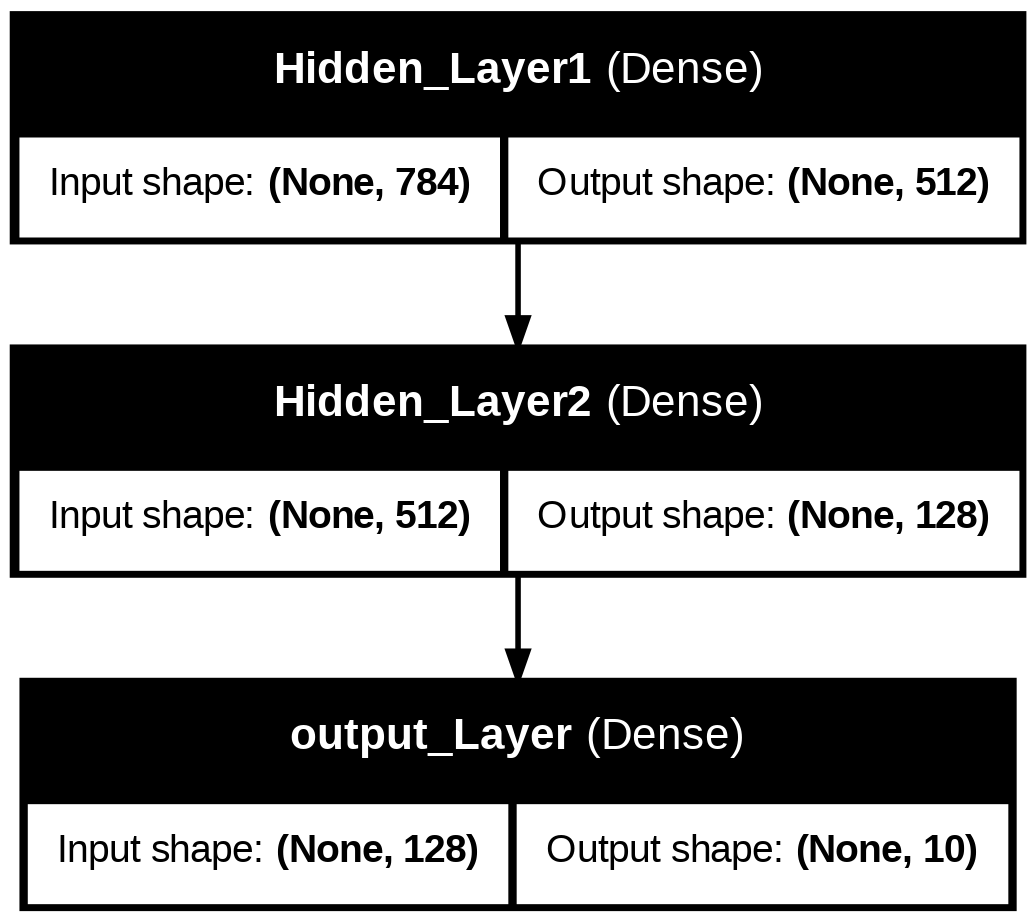

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)
#plot_model(model)

In [ ]:
# Import the optimizer
from tensorflow.keras.optimizers import RMSprop

#Define the optimizer
#optimizer = RMSprop(learning_rate=0.001) #Here, we have set our learning rate as 0.001

# Compile the model
# model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
# Import the optimizer


#Define the optimizer
optimizer = RMSprop(learning_rate=0.001) #Here, we have set our learning rate as 0.001

# Build the optimizer by calling `build` explicitly
optimizer.build(model.trainable_variables)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

1. The above code compiles the network.
2. The loss function used is sparse_categorical_crossentropy(It is also called log loss). For binary classification problems that give output in the form of probability,binary_crossentropy is the best choice which takes in the probability values.
3. It uses rmsprop as an optimizer( and other optimizers are Adam,gradient descent,adadelta,stochastic gradient descent).
4. The learning rate is taken to be 0.001. You can even try different values to see which works the best.
A traditional default value for the learning rate is 0.1,0.01,0.001, and this may represent a good starting point on your problem.
5. Mertics used to evaluate the model is accuracy. Accuracy calculates how often the predictions calculated by the model are correct.

# **6.3] Training a neural network**

In [ ]:
# define the batch_size and number of epochs
batch_size = 128 # batch_size should always be in the form of 2^n where n=1,2,......
num_epochs=20
# Fit a neural network or train a neural network
multiclass_classification = model.fit(x_train,y_train,validation_split=0.2,epochs=num_epochs,batch_size=batch_size,verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6888 - loss: 1.1204 - val_accuracy: 0.9124 - val_loss: 0.3065
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9096 - loss: 0.3058 - val_accuracy: 0.9287 - val_loss: 0.2378
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9293 - loss: 0.2372 - val_accuracy: 0.9413 - val_loss: 0.2007
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9406 - loss: 0.1979 - val_accuracy: 0.9518 - val_loss: 0.1682
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9516 - loss: 0.1599 - val_accuracy: 0.9586 - val_loss: 0.1471
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9577 - loss: 0.1392 - val_accuracy: 0.9584 - val_loss: 0.1416
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9646 - loss: 0.1169 - val_accuracy: 0.9647 - val_loss: 0.1236
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9705 - loss: 0.0995 - val_accu

# **6.4] Evaluate a trained network**


In [ ]:
# Evaluating our neural network uisng test dataset
score = model.evaluate(x_test,y_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0895


In [ ]:
print("Test Score(Loss):",score[0])
print("Test Accuracy:",score[1])

Test Score(Loss): 0.07538378238677979
Test Accuracy: 0.9768000245094299


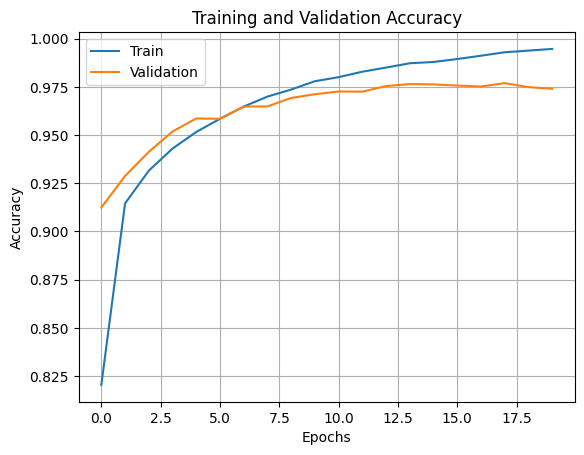

In [ ]:
# Plot training accuracy and validation accuracy
plt.plot(multiclass_classification.history['accuracy'])
plt.plot(multiclass_classification.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

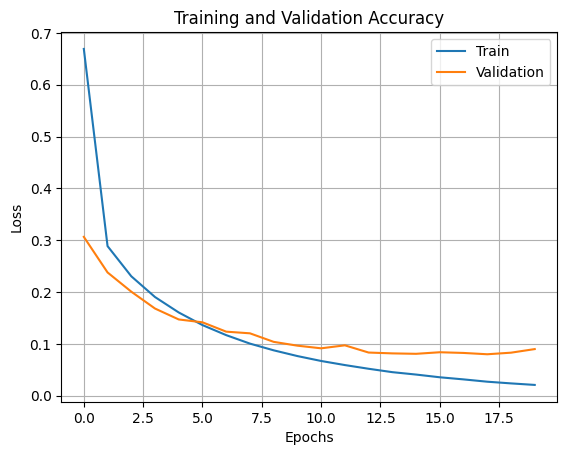

In [ ]:
# Plot training loss and Validation Loss
plt.plot(multiclass_classification.history['loss'])
plt.plot(multiclass_classification.history['val_loss'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

# **6.5]. Inference or Predictions using a trained neural network.**

In [ ]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
# predictions on test dataset using predict() function
y_pred=model.predict(x_test)
y_pred[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[8.1705974e-07, 2.8708794e-06, 1.5516624e-04, 5.3074774e-03,
        3.9156403e-09, 1.0297966e-06, 1.4919498e-12, 9.9396127e-01,
        2.6255580e-06, 5.6873565e-04],
       [3.5947927e-08, 2.2644537e-05, 9.9996465e-01, 8.0912241e-06,
        2.2860083e-09, 1.8165339e-08, 7.1396050e-07, 3.1431552e-10,
        3.7640391e-06, 8.0100778e-12],
       [2.9365001e-08, 9.8961508e-01, 7.0978109e-05, 1.8755260e-05,
        1.0212521e-05, 7.1262431e-05, 1.1050634e-04, 1.3431822e-04,
        9.9660316e-03, 2.7441215e-06],
       [9.9983430e-01, 8.4516989e-07, 7.6270248e-05, 6.8783032e-07,
        1.2078084e-06, 3.7243231e-06, 3.3196498e-05, 8.1551143e-06,
        1.3327536e-07, 4.1595187e-05],
       [3.8055859e-07, 1.4486277e-08, 3.4317495e-06, 5.3535119e-09,
        9.9950808e-01, 1.7030577e-07, 1.5651351e-06, 2.0282905e-06,
        3.2460787e-07, 4.8392778e-04],
       [5.9512915e-09, 9.9957246e-01, 1.1919016e-06, 1.3812777e-06,
        7.4767859e-06, 4.1935027e-07, 6.1330661e-07, 3.17

In [ ]:
y_pred = np.array([np.argmax(pred) for pred in y_pred])

In [ ]:
y_pred[:10],y_test[:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

# **6.6] Plot a Confusion matrix and Classification Report.**

In [ ]:
# Import libraries for plotting confusion matrix and classification reports
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import seaborn as sns

In [ ]:
# This function plots the confusion matrices given y_i,y_i_hat.

def plot_confusion_matrix(y_test,y_predict):
  cm = confusion_matrix(y_test,y_pred)
  labels = list(np.unique(y_test))

  # Color Map
  cmap = sns.light_palette("blue")

  #Plot Confusion Matrix
  plt.figure(figsize=(10,6))
  sns.heatmap(cm,annot=True,cmap=cmap,fmt=".3f", xticklabels=labels,yticklabels=labels)
  plt.xlabel("Predicted Class")
  plt.ylabel("Original Class")
  plt.title("Confusion Matrix")
  plt.show()

  print()
  print('-'*100)
  print("Classification Report:\n",classification_report(y_test,y_predict))
  print('Accuracy Score:' + str(accuracy_score(y_test,y_predict)*100))


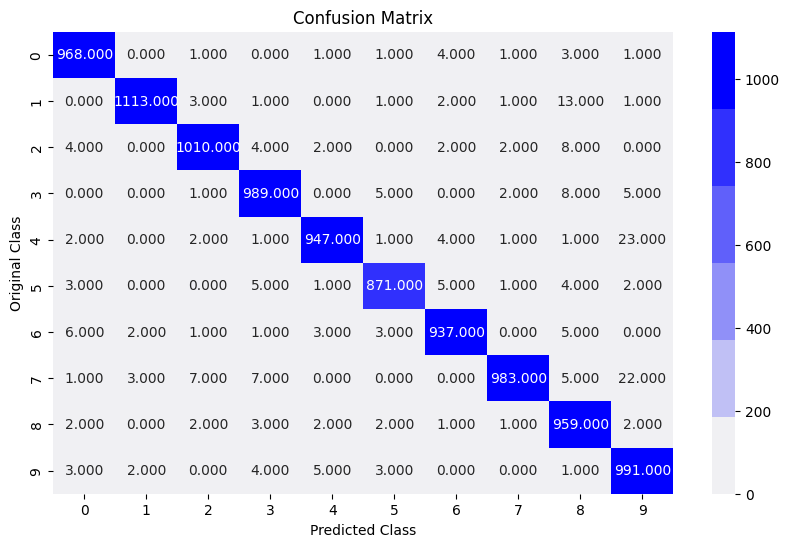


----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.95      0.98      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy Score:97.68


In [ ]:
plot_confusion_matrix(y_test,y_pred)

# **AGENDA**
  1. Save and load the whole model
  2. Save and load only the model weights.
  3. Save and load the architecture.

Here, to perform this exercise we'll using the same Multiclass Classification Model.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)                │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 937,750 (3.58 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 468,876 (1.79 MB)

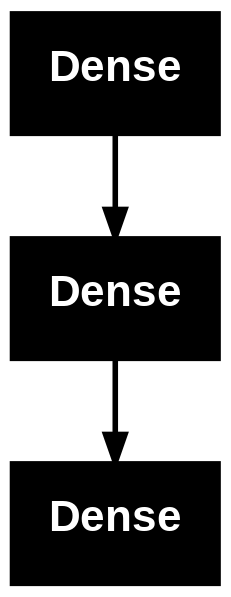

In [ ]:
plot_model(model)

# **1. Save and load the whole model**

In [ ]:
# 1. Save the whole Multiclass classification model
# two formats: SaveModel or HDF5

# i. File ending with no extension  i.e SavedModel
model.save("multiclass_classification.keras")

# ii. HDF5 - Hierarchical Data Format
model.save("multiclass_classification.h5") # .h5=HDF5

In [ ]:
# 2. Load the Saved Multiclass Classification Model
new_model = tf.keras.models.load_model('multiclass_classification.h5')

In [ ]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)                │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,876 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

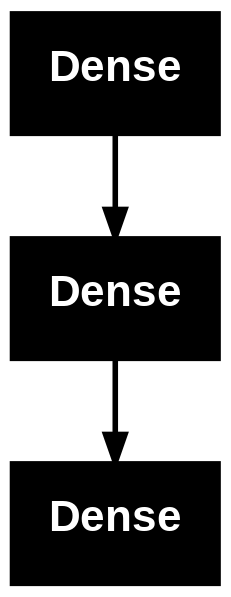

In [ ]:
plot_model(new_model)

In [ ]:
# Evaluating our new neural network using test dataset
score = new_model.evaluate(x_test,y_test,verbose=1)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9713 - loss: 0.0895
Test Score: 0.07538378238677979
Test Accuracy: 0.9768000245094299


In [ ]:
# Evaluating our old neural network using test dataset
score=model.evaluate(x_test,y_test,verbose=1)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9713 - loss: 0.0895
Test Score: 0.07538378238677979
Test Accuracy: 0.9768000245094299


# **2. Save and load only the model weights**

In [ ]:
# Save only the model weights of Multiclass Classification model into the HDF5 format
model.save_weights('multiclass_classification.weights.h5')

In [ ]:
# Load the weight of the saved for Multiclass Classification
# First initialize and compile the Sequential model
new_model = Sequential()
new_model.add(Dense(512,activation='sigmoid',input_shape=(input_dims,),name='Hidden_Layer1'))
new_model.add(Dense(128,activation='sigmoid',input_shape=(input_dims,),name="Hidden_Layer2"))
new_model.add(Dense(output_dims,activation="softmax",name="Output_Layer"))


# Compile the new model
new_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['Accuracy'])

In [ ]:
# Second, load the weights of the model using  load_weights()
new_model.load_weights('multiclass_classification.weights.h5')

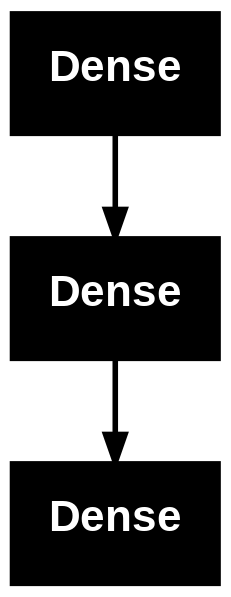

In [ ]:
plot_model(new_model)

In [ ]:
# Evaluating, load the weights of the model using load_weights()
score=new_model.evaluate(x_test,y_test,verbose=1)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9713 - loss: 0.0895
Test Score: 0.07538378238677979
Test Accuracy: 0.9768000245094299


In [ ]:
# Evaluating the our old neural network using test dataset
score=model.evaluate(x_test,y_test,verbose=0)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

Test Score: 0.07538378238677979
Test Accuracy: 0.9768000245094299


# **3. Save and load the model architecture**

In [ ]:
# Save the Multiclass Classification model architecture
# First, create the json string of the model  architecture using to_json()

json_string = model.to_json()

# Second, write the json_string as a json file
with open("multiclass_classification.json","w") as f:
  f.write(json_string)

In [ ]:
# Load the saved Multiclass Classification model architecture
# First, read the json file into json string

with open("multiclass_classification.json","r") as f:
    loaded_json_string = f.read()


# Second, load the model from json string using keras.models.model_from_json()

new_model = tf.keras.models.model_from_json(loaded_json_string)


In [ ]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)                │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_Layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 937,750 (3.58 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 468,876 (1.79 MB)

In [ ]:
# After this, we need to perform remaining steps like:
# 1. Compile the neural netowrk
# 2. Train the neural network
# 3. EValauate the neural Network
# 4. Prediction the output using the trained Neiral Network